# **COVID-19 Detection using CNN and Deep Learning (by X-ray Images) DIP Project FALL SEM (2021-22)**

### *Monish V 19MIS0310*

![](image.png)

In [3]:
import pandas as pd
import os
print(os.listdir("Dataset"))

['Covid', 'Normal', 'Prediction', 'Train', 'Val']


In [4]:
import tensorflow as ts
print(ts.__version__)

2.6.2


# Load Datasets

In [5]:
TRAIN_PATH = "Dataset\Train"
VAL_PATH = "Dataset\Val"
print("Loaded Successfully...")

Loaded Successfully...


# **Importing Required Libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **Building Architecture**


In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# **Train From Scratch**

## *Data Augmentation*

In [9]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [10]:
train_generator = train_datagen.flow_from_directory(
    'Dataset\Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 338 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [12]:
validation_generator = test_dataset.flow_from_directory(
    'Dataset\Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 61 images belonging to 2 classes.


# **Fit The Model**

In [13]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 65s 8s/step - loss: 0.8110 - accuracy: 0.5661 - val_loss: 0.6912 - val_accuracy: 0.4918
Epoch 2/10
8/8 [==============================] - 57s 7s/step - loss: 0.6709 - accuracy: 0.6016 - val_loss: 0.6667 - val_accuracy: 0.9180
Epoch 3/10
8/8 [==============================] - 54s 7s/step - loss: 0.5677 - accuracy: 0.7149 - val_loss: 0.5136 - val_accuracy: 0.9180
Epoch 4/10
8/8 [==============================] - 53s 7s/step - loss: 0.4176 - accuracy: 0.8512 - val_loss: 0.4385 - val_accuracy: 0.9344
Epoch 5/10
8/8 [==============================] - 56s 7s/step - loss: 0.3084 - accuracy: 0.8555 - val_loss: 0.2464 - val_accuracy: 0.9508
Epoch 6/10
8/8 [==============================] - 56s 7s/step - loss: 0.2663 - accuracy: 0.8945 - val_loss: 0.1421 - val_accuracy: 0.9508
Epoch 7/10
8/8 [==============================] - 53s 7s/step - loss: 0.3810 - accuracy: 0.8306 - val_loss: 0.1262 - val_accuracy: 0.9508
Epoch 8/10
8/8 [==================

## *Loss is very less and accuracy is on point*

In [14]:
model.save("Detection_Covid_19_DIP_JCOMP.h5")

In [15]:
model.evaluate(train_generator)

11/11 [==============================] - 24s 2s/step - loss: 0.1733 - accuracy: 0.9615


[0.17334726452827454, 0.9615384340286255]

In [16]:
model.evaluate(validation_generator)

2/2 [==============================] - 4s 2s/step - loss: 0.1603 - accuracy: 0.9508


[0.1603105664253235, 0.9508196711540222]

# **Test Images**

In [17]:
model = load_model("Detection_Covid_19_DIP_JCOMP.h5")

In [18]:
import os

In [19]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **Confusion Matrix**

In [20]:
y_actual = []
y_test = []

In [21]:
for i in os.listdir("Dataset/Val/Normal"):
  img = image.load_img("Dataset/Val/Normal/"+i,target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [22]:
for i in os.listdir("Dataset/Val/Covid"):
  img = image.load_img("Dataset/Val/Covid/"+i,target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [23]:
y_actual = np.array(y_actual)
y_test = np.array(y_test) 

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_actual, y_test)

In [26]:
import seaborn as sns

<AxesSubplot:>

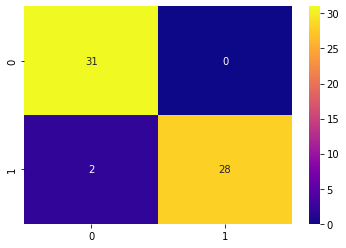

In [27]:
sns.heatmap(cm,cmap = "plasma" , annot=True)

In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ***Confusion Matrix***

Confusion matrix, without normalization
[[31  0]
 [ 2 28]]


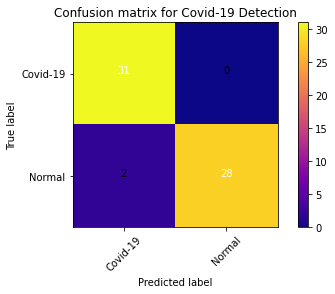

In [29]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


# **List all data in history**

In [30]:

history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Summarize history for accuracy**

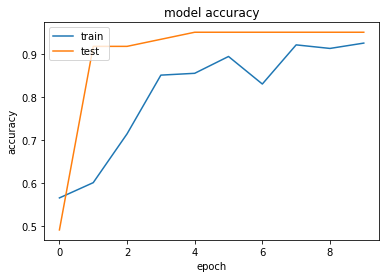

In [31]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Summarize history for loss**

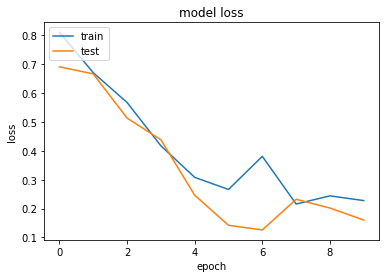

In [32]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


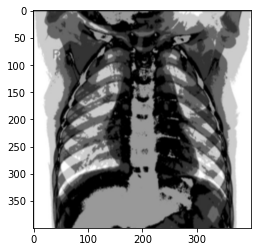

In [33]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('Dataset/Covid/ryct.2020200034img1.jpg', target_size = (224, 224,3))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices
imggg = cv2.imread('Dataset/Covid/ryct.2020200034img1.jpg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

This Xray Image is from validation folder
Prediction Of Our Model :  Positive For Covid-19


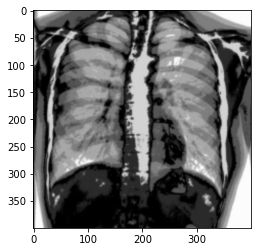

In [34]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('Dataset/Val/Covid/img1_1212.jpg', target_size = (224, 224,3))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices

imggg = cv2.imread('Dataset/Val/Covid/img1_1212.jpg')
print("This Xray Image is from validation folder")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

# Save the model to reuse it again for Web App // to be ready on Review 3

### import **pickle**
### open a file, where you want to store the data
### file = open('Covid19.pkl', 'wb')

### model = open('flight_rf.pkl','rb')
### seqential = pickle.load(model)